#**Assignment - Principal Component Analysis**

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

**Data:** wine.csv

## **Importing Necessary Libraries**

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## **Importing Data**

In [2]:
wine_data = pd.read_csv('wine.csv')
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## **Initial Analysis**

In [3]:
wine_data.shape

(178, 14)

In [4]:
wine_data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [5]:
wine_data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


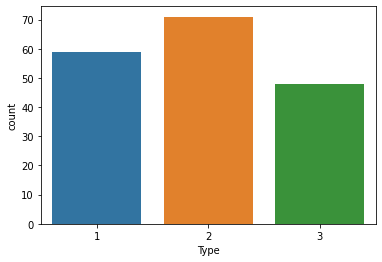

In [7]:
sns.countplot(wine_data['Type'])
plt.show()

## **Data Standardization**

In [13]:
x = wine_data.drop(labels='Type', axis=1)
y = wine_data[['Type']]

In [17]:
scale = StandardScaler()
scaled_x  = scale.fit_transform(x)
scaled_x 

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## **Applying PCA Fit Transform to dataset**

In [24]:
wine_data.corr().round(2) # PCA will function better if the features are highly correlated.

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.00,-0.33,0.44,-0.05,0.52,-0.21,-0.72,-0.85,0.49,-0.50,0.27,-0.62,-0.79,-0.63
Alcohol,-0.33,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64
Malic,0.44,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
Ash,-0.05,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22
Alcalinity,0.52,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44
Magnesium,-0.21,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39
Phenols,-0.72,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50
Flavanoids,-0.85,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49
Nonflavanoids,0.49,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31
Proanthocyanins,-0.50,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33


In [25]:
pca = PCA(n_components=2,random_state=12)
pca_values = pca.fit_transform(scaled_x )
pca_data = pd.DataFrame(pca_values)
pca_data.columns = ['PC1','PC2']
pca_data

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [21]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [26]:
variance = pca.explained_variance_ratio_
variance

array([0.36198848, 0.1920749 ])

In [33]:
import numpy as np
Var = np.cumsum(np.round(a = variance,decimals=4)*100)
Var

array([36.2 , 55.41])

In [35]:
pca_data.shape

(178, 2)

In [37]:
final_df=pd.concat([wine_data['Type'],pd.DataFrame(pca_values,columns=['PC1','PC2'])],axis=1)
final_df

,Type,PC1,PC2
0,1,3.316751,-1.443463
1,1,2.209465,0.333393
2,1,2.516740,-1.031151
3,1,3.757066,-2.756372
4,1,1.008908,-0.869831
...,...,...,...
173,3,-3.370524,-2.216289
174,3,-2.601956,-1.757229
175,3,-2.677839,-2.760899
176,3,-2.387017,-2.297347


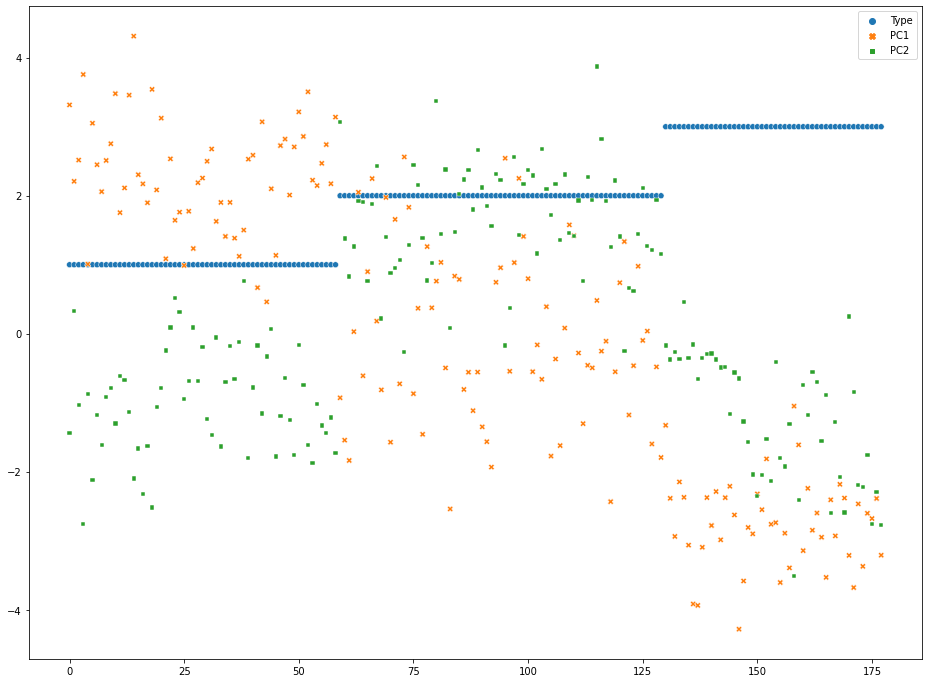

In [38]:
import seaborn as sns
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df);

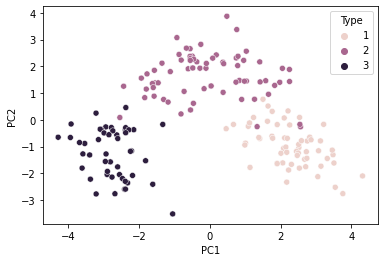

In [39]:
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='Type');

In [40]:
pca_values

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [43]:
X = pca_values[: ,0:1]

In [44]:
Y = pca_values[:,1:2]

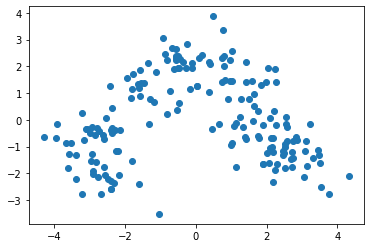

In [46]:
plt.scatter(X,Y);

## **Checking with other Clustering Algorithms**
#### **1. Hierarchical Clustering**

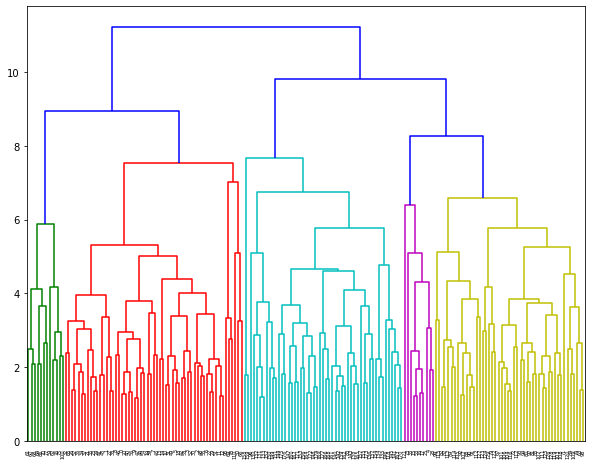

In [49]:
# As we already have normalized data, create Dendrograms
plt.figure(figsize=(10,8))
dendrogram=dendrogram(linkage(scaled_x ,'complete'))

In [50]:
# Create Clusters
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=3)

In [51]:
y=pd.DataFrame(hclusters.fit_predict(scaled_x),columns=['clustersid'])
y['clustersid'].value_counts()

2    64
0    58
1    56
Name: clustersid, dtype: int64

In [52]:
# Adding clusters to dataset
wine2=wine_data.copy()
wine2['clustersid']=hclusters.labels_
wine2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [54]:
# Types in cluster #0 
wine2[wine2['clustersid']==0]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,0
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,0
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,0
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,0
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,0
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,0
72,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,0
74,2,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,0
75,2,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428,0
76,2,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392,0


In [55]:
# Types in cluster #1 
wine2[wine2['clustersid']==1]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.270000,1.250,1.67,680,1
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.980,1.59,450,1
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.170000,1.020,1.93,750,1
70,2,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.050000,0.906,1.82,870,1
77,2,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.650000,0.960,2.52,500,1
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.840,2.01,515,1
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.500000,0.950,2.26,625,1
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.700,2.12,372,1
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.760,1.29,630,1
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.740,1.42,530,1


In [56]:
# Types in cluster #2 
wine2[wine2['clustersid']==2]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678,2
66,2,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,2
71,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410,2
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,2


#### **OBSERVATION:**
  * Cluster 0 includes only Type 2
  * Cluster 1 includes  Type 2 & 3
  * Cluster 2 includes  Type 1 & 2

#### **2. K-Means Clustering**

###### **Points to remember**

* As we already have normalized data
* Use Elbow Graph to find optimum number of  clusters (K value) from K values range
* The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
* random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

In [58]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_x)
    wcss.append(kmeans.inertia_)

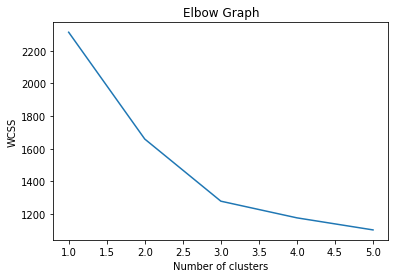

In [59]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

In [63]:
# Cluster algorithm using K=3
clusters_3 =KMeans(3,random_state=12).fit(scaled_x)
clusters_3

KMeans(n_clusters=3, random_state=12)

In [64]:
clusters_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [66]:
# Assign clusters to the data set
wine3=wine_data.copy()
wine3['clusters3_id']=clusters_3.labels_
wine3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3_id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [67]:
wine3['clusters3_id'].value_counts()

0    65
1    62
2    51
Name: clusters3_id, dtype: int64

In [68]:
# Types in cluster #0 
wine3[wine3['clusters3_id']==0]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3_id
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,0
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,0
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,0
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,0
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,0
126,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,0
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,0
128,2,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,0


In [69]:
# Types in cluster #1 
wine3[wine3['clusters3_id']==1]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3_id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270,1
58,1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,1
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,1
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937,1


In [70]:
# Types in cluster #2 
wine3[wine3['clusters3_id']==2]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3_id
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.98,1.59,450,2
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.84,2.01,515,2
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.70,2.12,372,2
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,2
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,2
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,2
133,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,2
134,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,2
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,2
136,3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,2


#### **OBSERVATION:**
  * Cluster 0 includes only Type 2
  * Cluster 1 includes  Type 1 & 2
  * Cluster 2 includes  Type 2 & 3